In [23]:
from games.nocca_nocca.nocca_nocca import NoccaNocca
from agents.agent_random import RandomAgent
from agents.minimax import MiniMax
from agents.mcts import MonteCarloTreeSearch
from eval import heuristic_nocca
import time

In [46]:
game = NoccaNocca(max_steps=150, initial_player=0, seed=1)

In [47]:
agents = {
    game.agents[0]: RandomAgent(game=game, agent=game.agents[0]),
    game.agents[1]: MonteCarloTreeSearch(game=game, agent=game.agents[1], simulations=100, rollouts=4),
    #game.agents[1]: MiniMax(game=game, agent=game.agents[1], depth=4),
    #game.agents[1]: MonteCarloTreeSearch(game=game, agent=game.agents[1], eval=heuristic_nocca, simulations=100, rollouts=4),
}

In [48]:
# Inicializar las estructuras para guardar los tiempos
times_by_agent = {agent: [] for agent in game.agents}
turns = []

game.reset()
print(f"Initial Agent: {game.agent_selection}")
while not game.game_over():
    game.render()
    agent_id = game.agent_selection
    t_i = time.time()
    action = agents[agent_id].action()
    t_f = time.time()

    elapsed = t_f - t_i
    times_by_agent[agent_id].append(elapsed)
    turns.append(game.steps)

    print(f"Agent {agent_id} took {elapsed:.2f} seconds to choose action")
    print(f"Turn {game.steps} -- Agent {agent_id} plays action {action}")
    game.step(action=action)
game.render()
if game.truncated():
    print("Game was truncated")
for agent in agents:
    print(f"Reward agent {agent}: {game.reward(agent)}")
print(f"The winner is: {game.check_for_winner()}")

Initial Agent: Black
0: ___ ___ ___ ___ ___ 
1: 0__ 0__ 0__ 0__ 0__ 
2: ___ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Agent Black took 0.00 seconds to choose action
Turn 0 -- Agent Black plays action 52
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 0__ 0__ 0__ 
2: 0__ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ ___ ___ ___ 
6: 1__ 1__ 1__ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Agent White took 34.23 seconds to choose action
Turn 1 -- Agent White plays action 256
0: ___ ___ ___ ___ ___ 
1: 0__ ___ 0__ 0__ 0__ 
2: 0__ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6: 1__ 1__ ___ 1__ 1__ 
7: ___ ___ ___ ___ ___ 
Agent Black took 0.00 seconds to choose action
Turn 2 -- Agent Black plays action 41
0: ___ ___ ___ ___ ___ 
1: ___ ___ 0__ 0__ 0__ 
2: 00_ ___ ___ ___ ___ 
3: ___ ___ ___ ___ ___ 
4: ___ ___ ___ ___ ___ 
5: ___ ___ 1__ ___ ___ 
6:

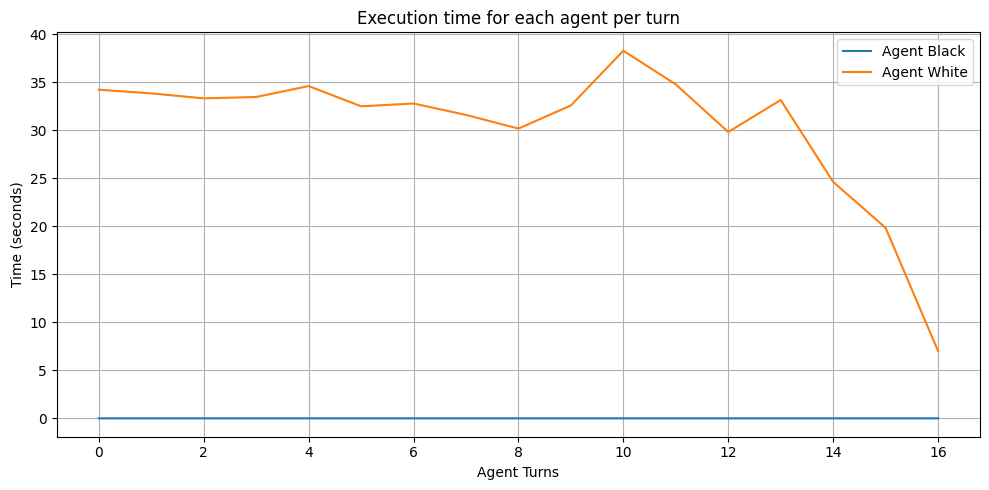

In [49]:
import matplotlib.pyplot as plt

# Graficar tiempos por turno
plt.figure(figsize=(10, 5))
for agent_id, times in times_by_agent.items():
    plt.plot(times, label=f"Agent {agent_id}")

plt.xlabel("Agent Turns")
plt.ylabel("Time (seconds)")
plt.title("Execution time for each agent per turn")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
from nbconvert import HTMLExporter
import nbformat, os

def save_notebook_to_html(notebook_path=f"Nocca_Nocca.ipynb"):
    """Guarda el notebook como HTML"""
    exporter = HTMLExporter()
    notebook = nbformat.read(notebook_path, as_version=4)
    html, _ = exporter.from_notebook_node(notebook)
    
    os.makedirs("notebook_exports", exist_ok=True)
    timestamp = time.strftime("%Y%m%d-%H%M%S")
    output_path = f"notebook_exports/NoccaNocca_RandomAgent_vs_MCTS_100_rollout_4_{timestamp}.html"
    
    with open(output_path, "w") as f:
        f.write(html)
    
    return output_path

In [51]:
save_notebook_to_html()

'notebook_exports/NoccaNocca_RandomAgent_vs_MCTS_100_rollout_4_20250703-160919.html'